# Binomial on 2D data

This model will contain a grid of districts in a city identified by two coordinates, distance to the sea and distance to the river. Each district will have some parameters, which will actually be dependent on the coordinates, to regulate the participation and the vote intention (assuming a 2 party system).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
N = 13
M = 8
inhabitants_per_district = 26000
river_distance = np.linspace(0,20,N)
sea_distance = np.linspace(0,10,M)

In [3]:
threshold = 2
inhabitants_per_district -= threshold
a = -((river_distance-river_distance[N//2])**2)
a = a/np.max(np.absolute(a))
a -= a.min()-1.2
b = np.linspace(3,1,M)

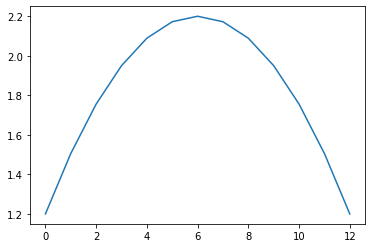

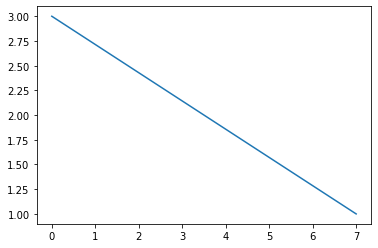

In [4]:
plt.figure()
plt.plot(a)
plt.figure()
plt.plot(b)

## Expected results
Below there are some plots to show more or less what is expected of the model to tell. However, the particular realization can differ to some extent.

In [5]:
beta = np.random.beta(a[:, None, None],b[None, :, None],size=(N,M, 100))
beta_mean = beta.mean(axis=-1)

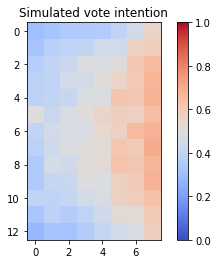

In [6]:
plt.imshow(beta_mean,vmin=0,vmax=1,cmap="coolwarm")
plt.colorbar();
plt.title("Simulated vote intention");

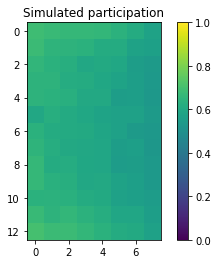

In [7]:
plt.imshow(.9/(1+beta.mean(axis=-1)),vmin=0,vmax=1)
plt.colorbar(),
plt.title("Simulated participation");

Check winner of the elections in many realizations

In [8]:
elections = np.empty(500)
for i in range(len(elections)):
    beta = np.random.beta(a[:, None, None],b[None, :, None],size=(N,M, 2))
    votes = np.random.binomial(inhabitants_per_district, .9/(1+beta[:,:,0]))
    right_wing_votes = np.random.binomial(votes, beta[:,:,1])
    right = right_wing_votes.sum()
    left = votes.sum()-right
    elections[i] = right>left
print("Out of {} elections, the right wing party won {:.2f} %".format(elections.size, 100*elections.mean()))

Out of 500 elections, the right wing party won 19.00 %


## Generate and store one realization

In [9]:
beta = np.random.beta(a[:, None, None],b[None, :, None],size=(N,M, 2))
votes = np.random.binomial(inhabitants_per_district, .9/(1+beta[:,:,0]))
right_wing_votes = np.random.binomial(votes, beta[:,:,1])

In [10]:
data = np.vstack([votes+threshold,right_wing_votes+threshold//2]) # avoid possible extreme cases of right_wing_votes=0 or 
                                               # votes=right_wing_votes
multiindex = np.array([("total", i) for i in range(N)] + [("right", i) for i in range(N)]).T
multiindex = pd.MultiIndex.from_arrays(multiindex, names=['category', 'number'])
df = pd.DataFrame(data, index=multiindex)
df.to_csv("2D_data_N_inhabitants_{}.csv".format(inhabitants_per_district+threshold))